# Разработка стратегии взаимодействия с клиентами сети фитнес-центров "Культурист-датасаентист"

На основе аналитических данных необходимо провести анализ и подготовить план действий по удержанию клиентов.
План анализа:
- [срогнозировать вероятность оттока на уровне следующего месяца;](#section1)
- [сформировать типичные портреты клиентов;](#section2)
- [выделить основные признаки, наиболее сильно влияющие на отток;](#section3)
- [выводы и рекомендации по повышению качества работы с клиентами.](#section4)
    

# Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter('ignore')

In [2]:
gym = pd.read_csv('/datasets/gym_churn.csv')
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


# Шаг 2. Исследовательский анализ данных EDA

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
gym.duplicated().sum()

0

In [5]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


# Портрет среднестатистического клиента

Среднестатистический клиент фитнес-клуба "Культурист-датасаентист" выглядит так:
- Проживает или работает недалеко от клуба
- Средняя длительность абонемента 1 месяц
- Средний возраст 29 лет
- Тратит на дополнительные услуги около 136 у.е.
- Посещает клуб в среднем 1,8 раз в неделю
- В предыдущем месяце средняя посещаемость 1,7 раз в неделю
- В среднем около 26% клиентов попали в отток

In [6]:
gym.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


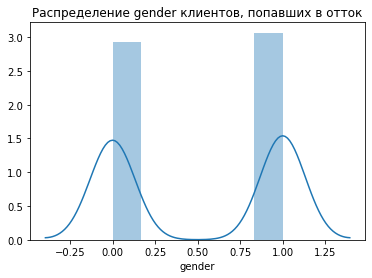

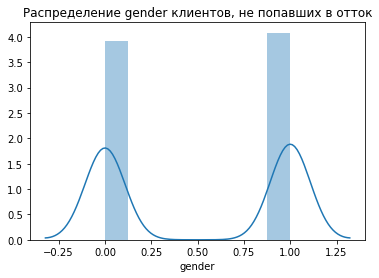

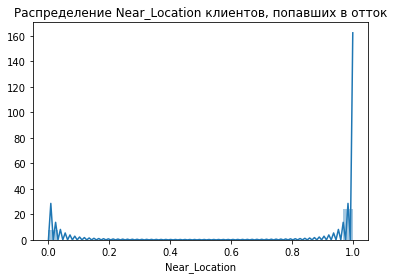

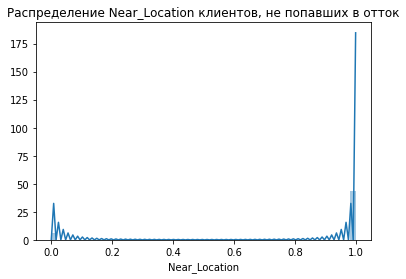

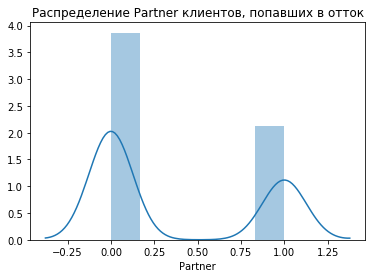

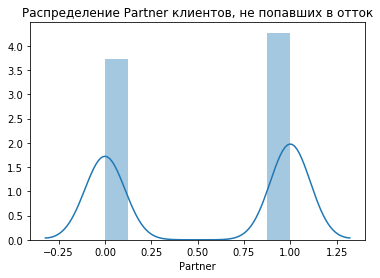

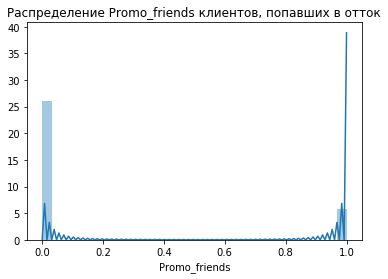

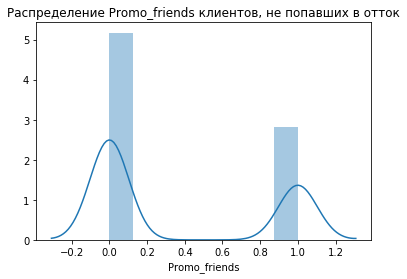

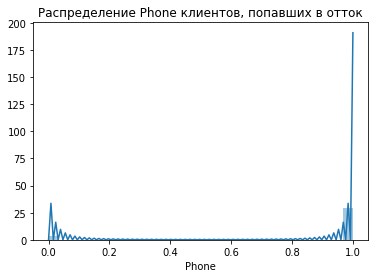

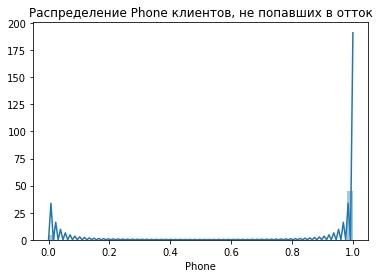

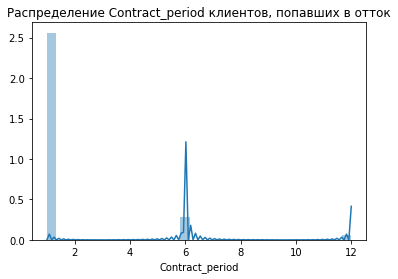

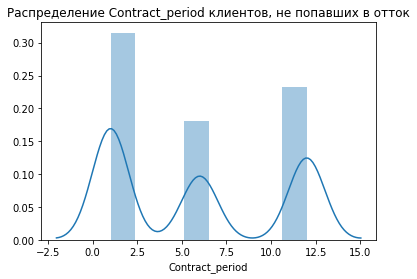

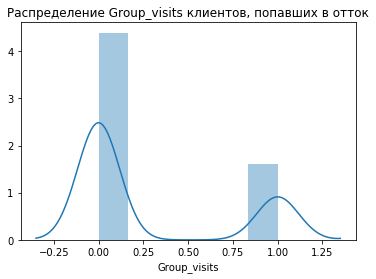

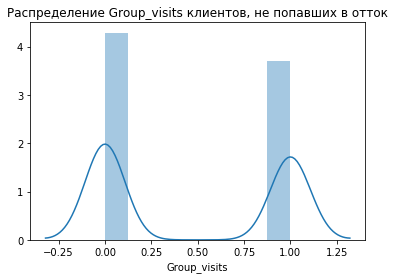

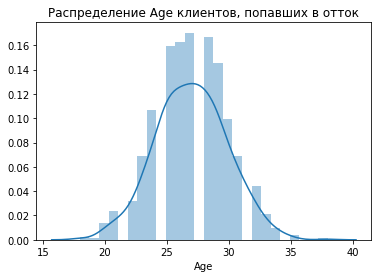

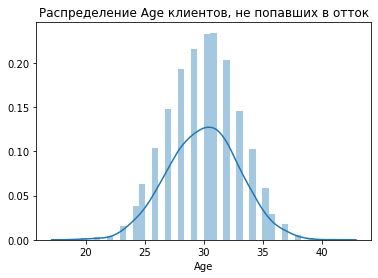

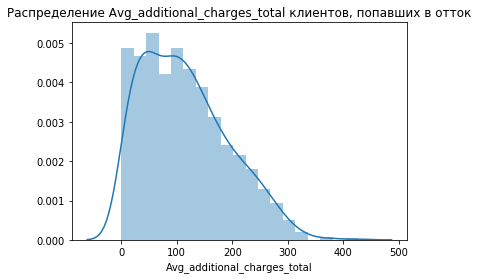

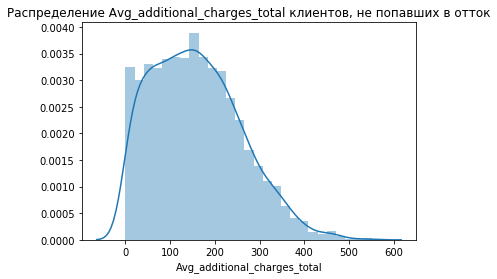

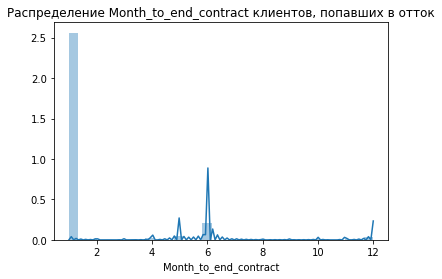

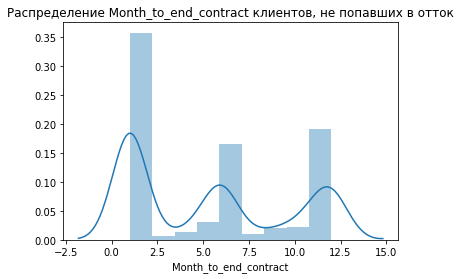

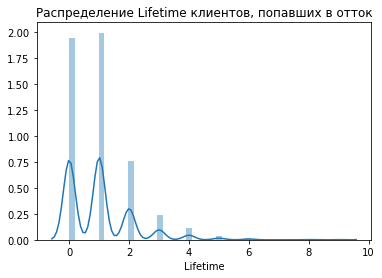

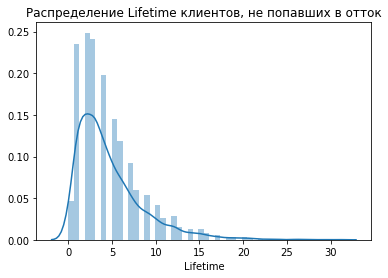

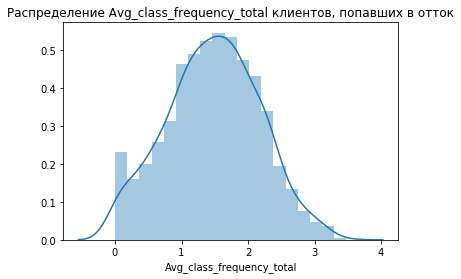

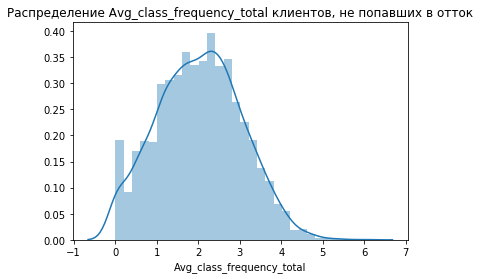

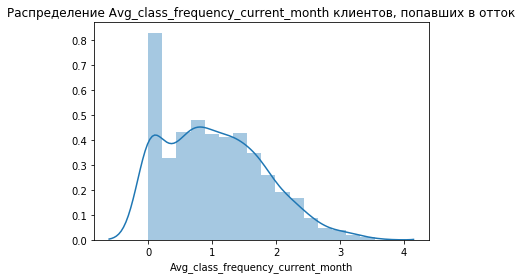

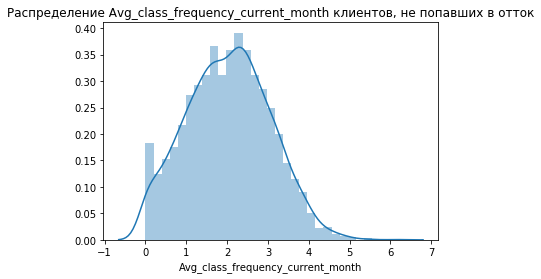

In [7]:
gym_churn = gym.query('Churn==1')
gym_not_churn = gym.query('Churn==0')

for column in gym.drop('Churn', axis=1):
    
    sns.distplot(gym_churn[column])
    plt.title('Распределение ' + column + ' клиентов, попавших в отток')
    plt.show()
    
    sns.distplot(gym_not_churn[column])
    plt.title('Распределение ' + column + ' клиентов, не попавших в отток')
    plt.show()
    

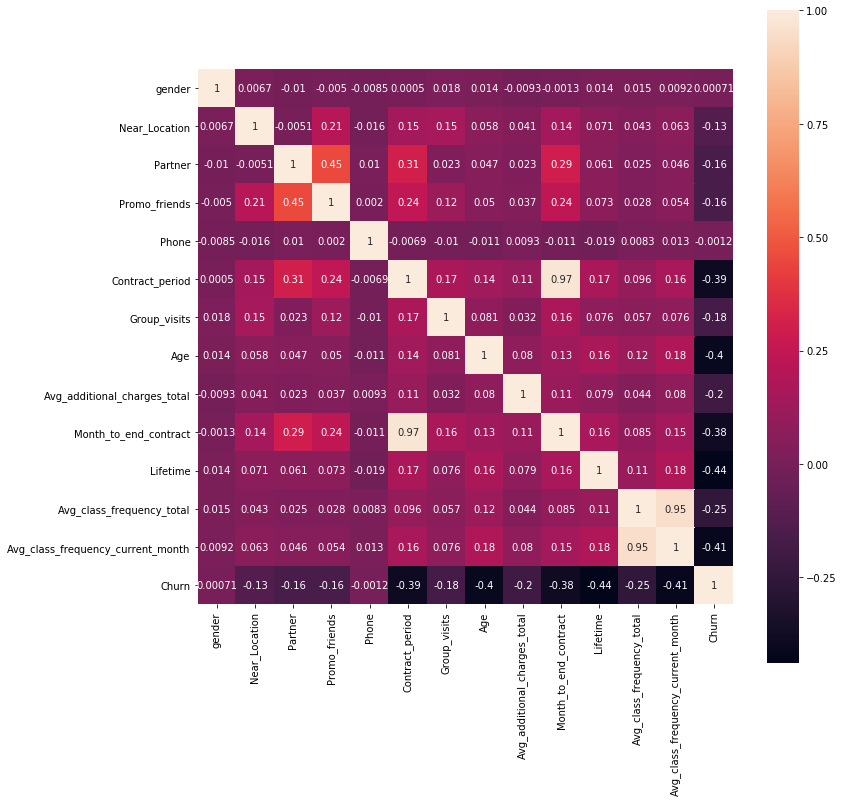

In [8]:
cm = gym.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, square=True)

plt.show()

# Вывод

Набор данных состоит из 4 тыс наблюдений и 13 признаков, не содержит аномальных или пропущенных значений.

Чаще всего в отток попадают клиенты, которые:
- не являются сотрудниками компаний-партнеров
- заключают договор на 1 месяц
- не посещают групповые занятия
- средний возраст 26 лет
- в текущем месяце заканчивается срок действия абонемента
- средняя частота посещения 1-2 раза в неделю за весь период абонемента
- за предыдущий месяц в среднем посещали спортзал менее 1 раза в неделю

Матрица корреляций показала сильную зависимость срока до окончания абонемента и длительности абонемента, среднего количества посещений в неделю за предыдущий месяц и всего периода абонемента. Эта зависимость достаточно логична. Признаки являются мультиколлинеарными, поэтому длительность абонемента и среднее количество посещений за весь период абонемента стоит удалить из набора данных.

In [9]:
gym.drop(['Avg_class_frequency_total', 'Contract_period'], axis=1, inplace=True)

# Прогнозирование оттока клиентов
<a class="anchor" id="section1"></a>

In [10]:
X = gym.drop('Churn', axis=1)
y = gym['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0, n_estimators=100)]

def fit_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(model)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, y_pred)))
    
for m in models:
    fit_model(m, X_train, y_train, X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
	Accuracy: 0.91
	Precision: 0.85
	Recall: 0.80


# Вывод

Логистическая регрессия показала лучшие результаты на валидационной выборке по доле правильных ответов, точности и полноте предсказания.

# Кластеризация клиентов
<a class="anchor" id="section2"></a>

In [11]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [12]:
print(X_sc[:10])

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  1.19403206
  -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.19403206
   0.55732732 -0.35021325  1.83194105  0.87368001  0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.83749845
  -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02901851]
 [-1.0207145   0.42788074  1.02686062  1.49716101  0.32681319  1.19403206
   1.17120844 -0.87472237  1.83194105 -0.46008079  1.51045005]
 [ 0.97970588  0.42788074  1.02686062  1.49716101  0.32681319 -0.83749845
  -0.97737548  0.5336998  -0.79287273 -0.19332863 -0.61454183]
 [ 0.97970588  0.42788074 -0.973842   -0.66793083  0.32681319  1.19403206
   1.478149    3.15330097 -0.79287273 -0.19332863  0.82634551]
 [ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  1.19403206
   0.86426788 -0.54676556  0.40022445 -0.46008079 -0.46525669]
 [-1.0207145   0.42788074 -0.973842   -0.

In [13]:
linked = linkage(X_sc, method='ward')

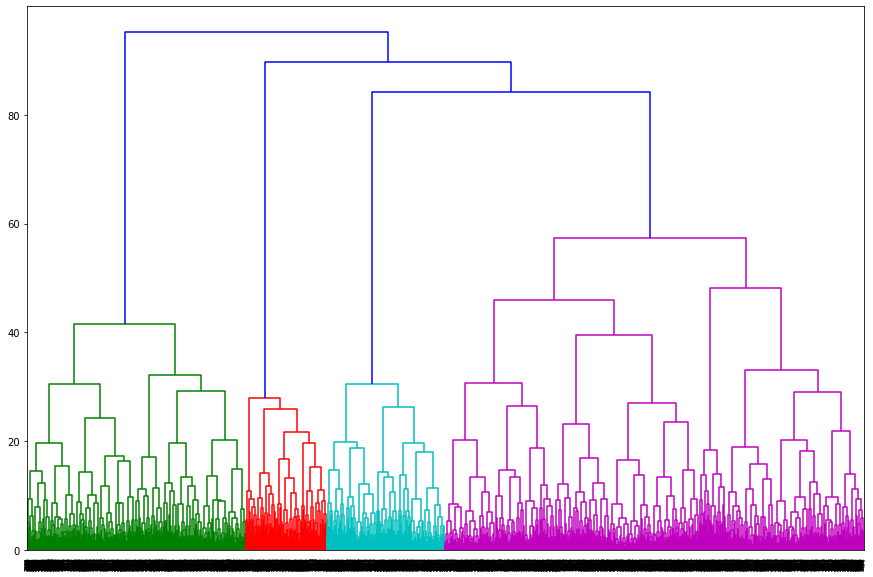

In [14]:
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.show()

In [15]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_sc)

In [16]:
gym['cluster_km'] = labels

In [17]:
gym.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,
0,0.492000,0.994000,0.953000,1.000000,0.906000,0.528000,29.633000,154.086252,6.730000,4.287000,1.919105,0.108000
1,0.495352,0.998672,0.378486,0.046481,0.903054,0.000000,30.342629,174.392898,4.698539,5.166003,2.237272,0.046481
2,0.510507,1.000000,0.224969,0.114957,0.899876,0.187886,26.800989,111.061687,1.710754,1.422744,0.984420,0.740420
3,0.502455,0.000000,0.489362,0.072013,0.913257,0.232406,28.700491,137.375245,2.826514,3.027823,1.599583,0.400982
4,0.551391,0.998791,0.275695,0.074970,0.897219,1.000000,30.275695,155.484435,4.730351,4.499395,2.044372,0.089480


In [18]:
gym.groupby('cluster_km')['Age'].median()

cluster_km
0    30
1    30
2    27
3    29
4    30
Name: Age, dtype: int64

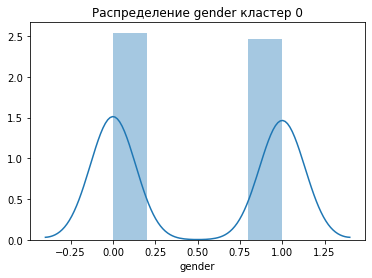

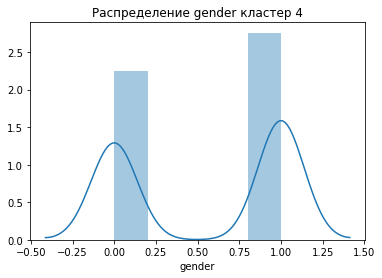

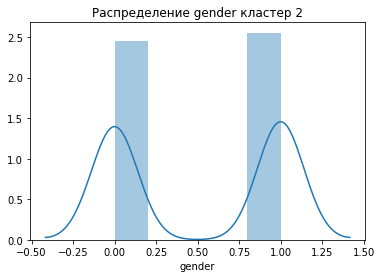

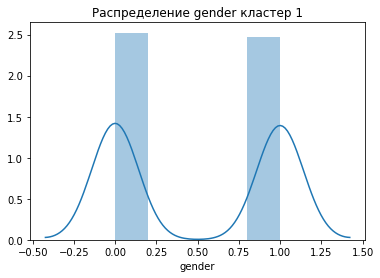

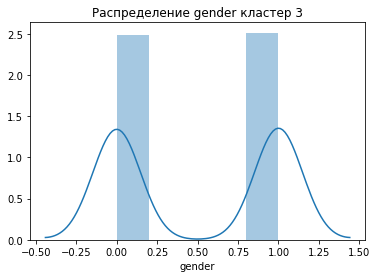

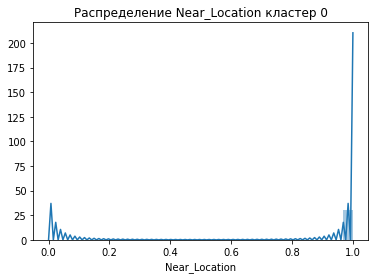

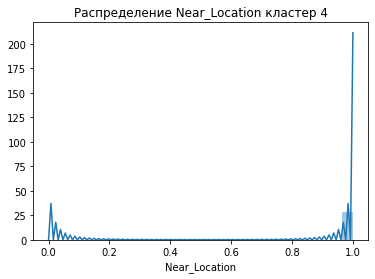

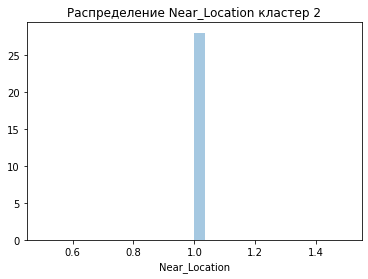

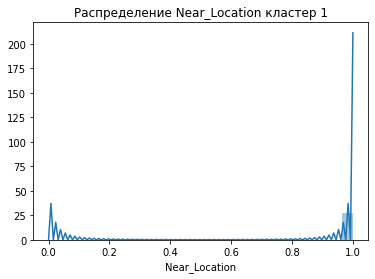

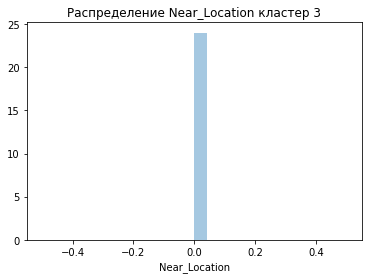

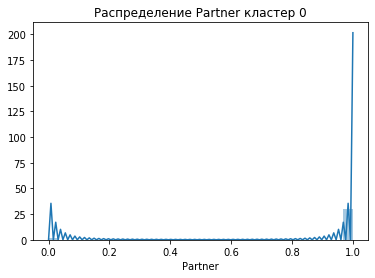

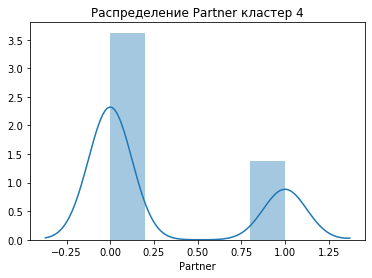

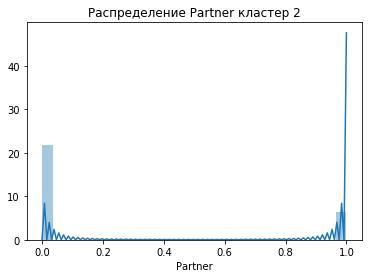

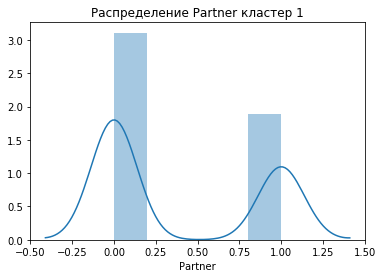

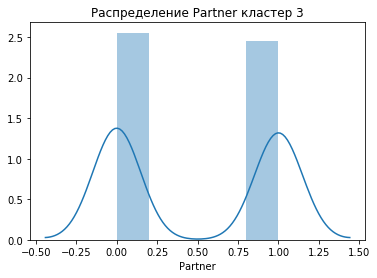

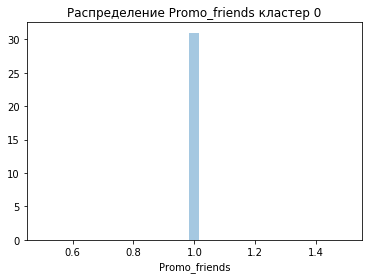

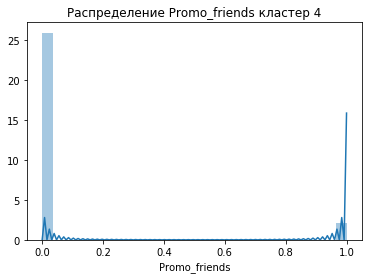

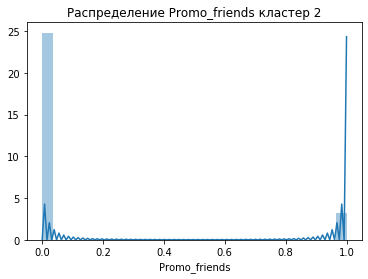

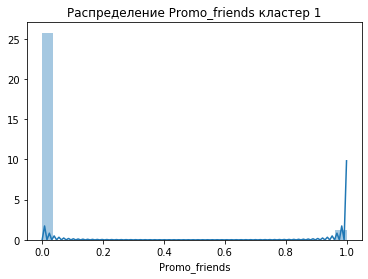

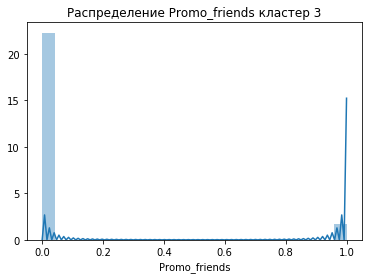

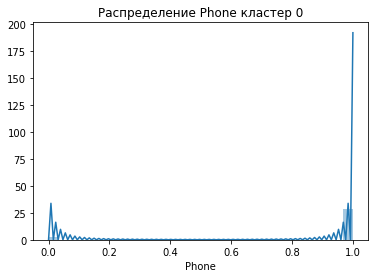

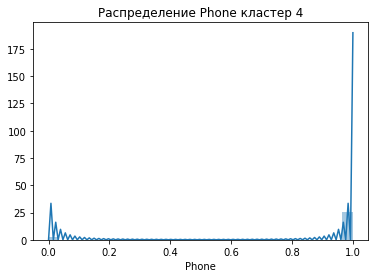

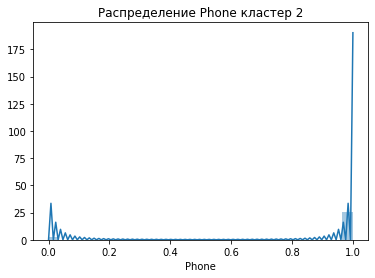

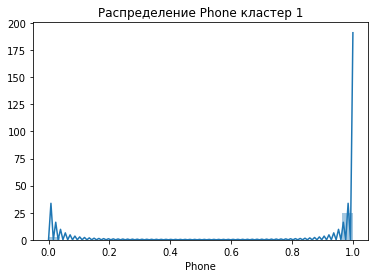

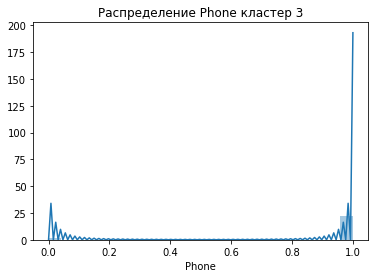

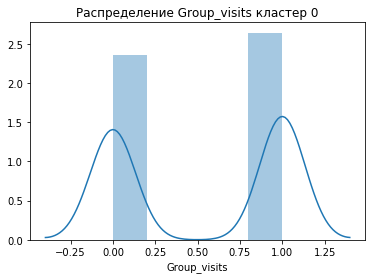

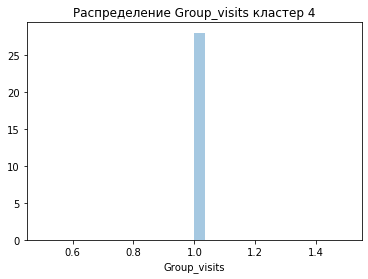

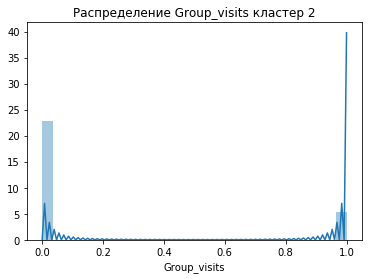

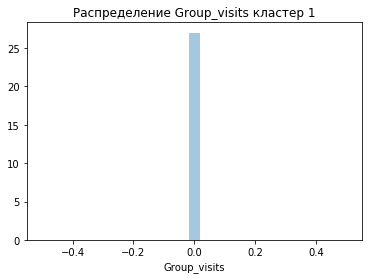

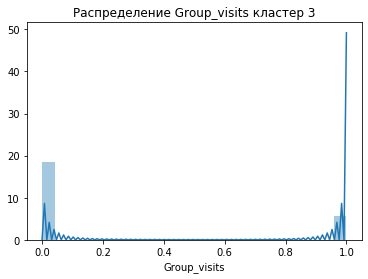

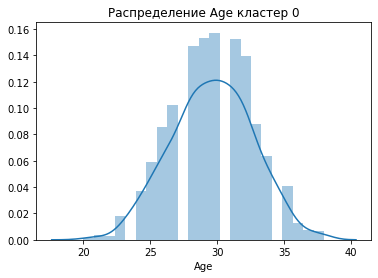

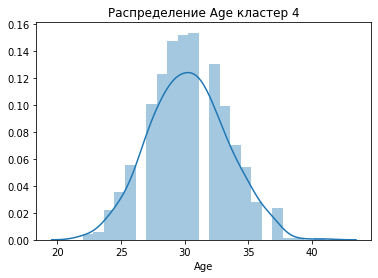

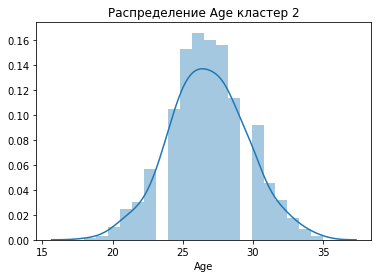

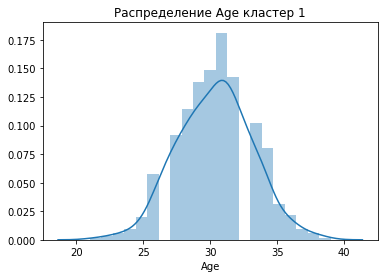

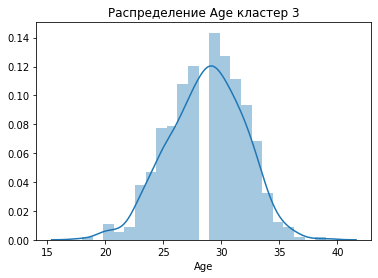

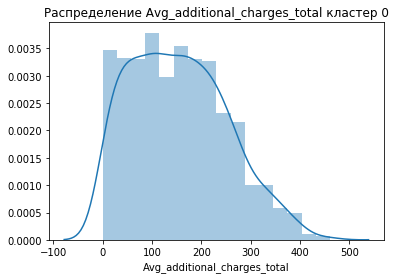

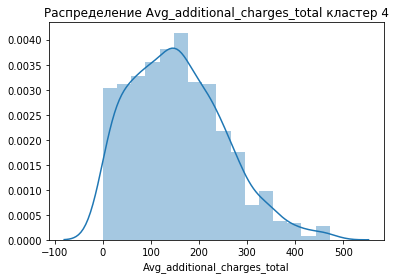

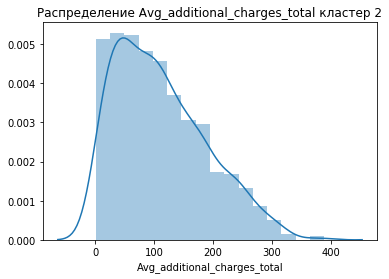

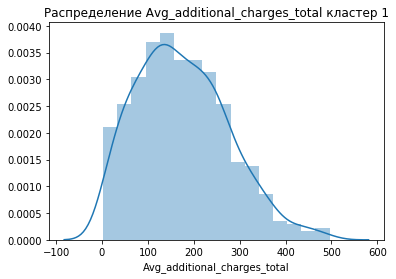

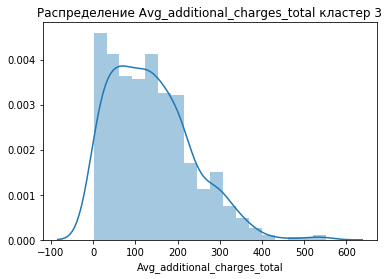

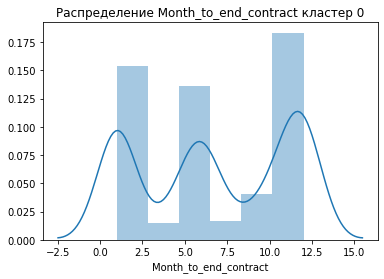

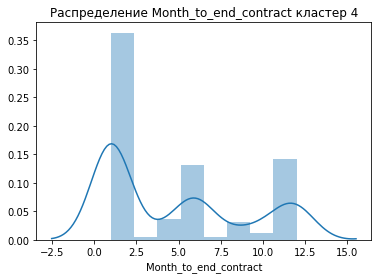

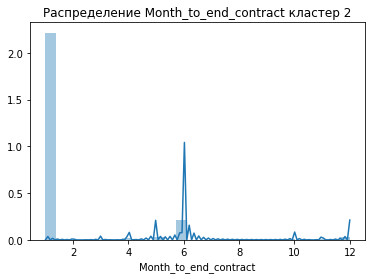

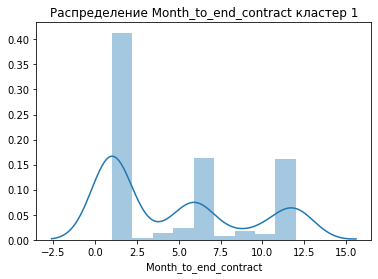

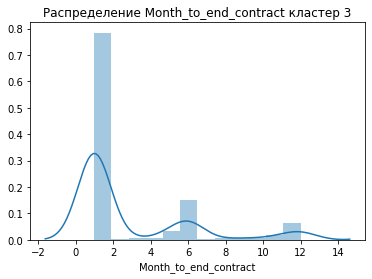

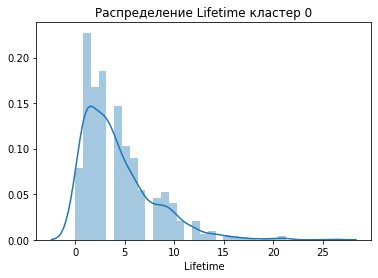

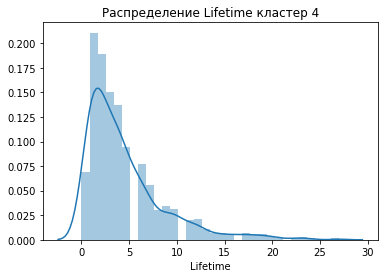

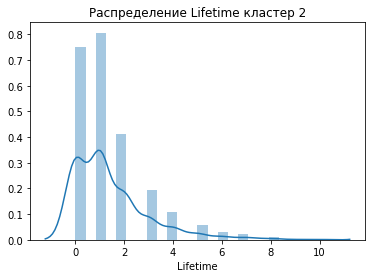

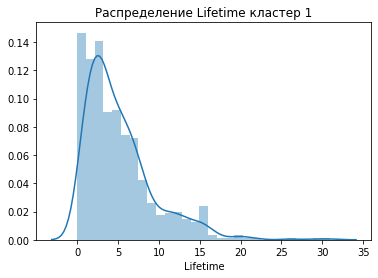

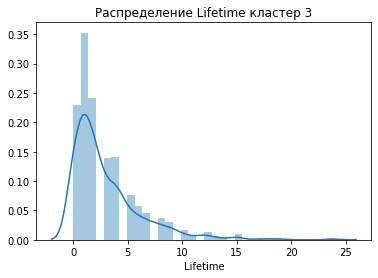

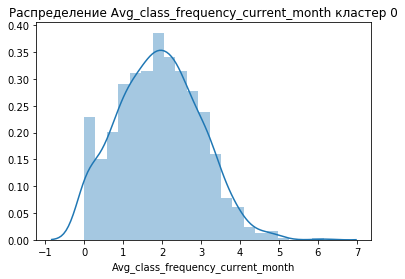

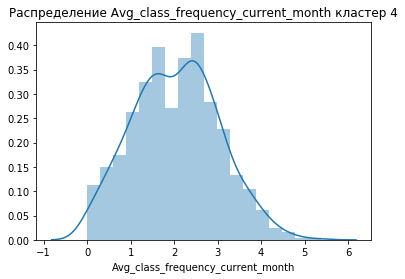

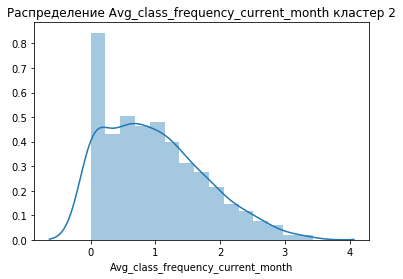

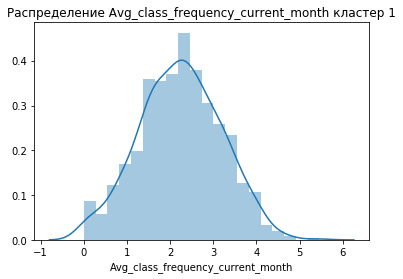

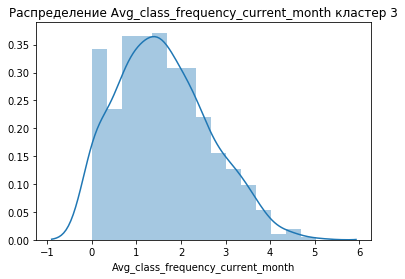

In [19]:
for column in gym.drop(['Churn', 'cluster_km'], axis=1):
    for cluster in gym['cluster_km'].unique():
        
    
        sns.distplot(gym.query('cluster_km==@cluster')[column])
        plt.title('Распределение ' + column + ' кластер '+ str(cluster))
        plt.show()
    
    

In [20]:
gym.groupby('cluster_km')['Churn'].mean()

cluster_km
0    0.108000
1    0.046481
2    0.740420
3    0.400982
4    0.089480
Name: Churn, dtype: float64

# Вывод
<a class="anchor" id="section3"></a>

На основе дендрограммы можно выделить 5 кластеров клиентов.

Кластер 0 - это клиенты, которые были привлечены по акции "Приведи друга". Отток этой группы составил 10%, что ниже среднего значения 26%. Клиенты этого кластера в основном заключают долгосрочный договор и посещали клуб в предыдущем месяце в среднем 1,9 раз в неделю.

Клиенты кластера 1 не посещали групповые занятия, средний возраст составляет более 30 лет, среднее количество посещений в неделю 2,2 раза и так же предпочитают покупать долгосрочные абонементы. Отток этого кластера самый низкий - всего 4,6%.

74% клиентов кластера 2 попали в отток, несмотря на то, что работают или проживают недалеко от фитнес-клуба. Эта группа приобретает в основном абонементы на 1 месяц и посещает клуб в среднем 1 раз в неделю. Так же средний возраст клиентов этой группы самый низкий - 27 лет.

Отток кластера 3 тоже достаточно высокий - 40%. Клиенты этой группы проживают или работают далеко от клуба, а значит тратят время на дорогу и при возможности перейдут в фитнес-клуб поближе. В среднем посещаемость в неделю - 1,6 раз.

Кластер 4 выглядит так же достаточно стабильным - отток составил 8,9%. Все клиенты этого кластера посещали групповые занятия и пользовались абонементом в среднем 2 раза в неделю.

**Основные признаки, наиболее влияющие на отток:**
1. Продолжительность абонемента - 1 месяц.
2. Возраст моложе 29 лет
3. Редкое посещение - 1 раза в неделю
4. Не проживают и не работают рядом с фитнес-клубом

# Рекомендации
<a class="anchor" id="section4"></a>

1. Проанализировать рентабельность привлечения клиентов по акции "Приведи друга" и стоит ли расширять эту категорию клиентов. Анализ показал, что эта группа клиентов имеет низкий отток - 10%

2. Сосредоточиться на удержании клиентов, которые проживают или работают рядом с фитнес-клубом. Выяснить почему клиенты кластера 2 предпочитают не продлевать договор. Учесть график работы клуба - позволяет ли он посещать до и после работы; удобства раздевалок и душевых; программа групповых занятий; доступность тренеров для персональных тренировок; загруженность зала. Так же провести дополнительный анализ в какое время характерно посещение этой группы клиентов и вид групповых занятий.

3. Проанализировать где работают или проживают клиенты кластера 3 и расширить сеть фитнес-клуба.

4. Провести анкетирование или опрос среди клиентов кластеров 0,1 и 4 с целью выяснения способов улучшения сервиса. Очевидно, что эти группы клиентов самые лояльные и могут предоставить ценную информацию.

5. При запуске маркетинговых акций ориентироваться на средний возраст клиентов 29 лет.

6. Предлагать выгодные условия персональных тренировок для клиентов, которым не интересны групповые занятия.